# Multicollinearity of Features - Lab

## Introduction

In this lab, you'll identify multicollinearity in the Boston Housing dataset.

## Objectives
You will be able to:
* Create and Interpret a correlation matrix/heatmap and scatter matrix
* Identify if variables are exhibiting collinearity

## Correlation matrix for the Boston Housing data

Let's reimport the Boston Housing data and use the data with the categorical variables for `tax_dummy` and `rad_dummy`: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX", drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD", drop_first=True)
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

# Inspect the data
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0


## Scatter matrix

Create the scatter matrix for the Boston Housing data: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c5939b0>,
      dtype=object)

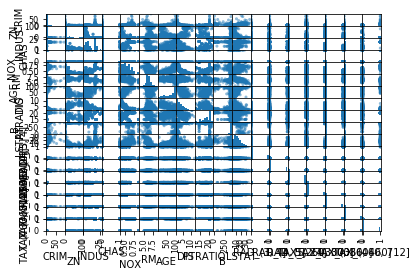

In [3]:
pd.plotting.scatter_matrix(boston_features)

This took a while to load. Not surprisingly, the categorical variables didn't really provide any meaningful result. Remove the categorical columns associated with `'RAD'` and `'TAX'` from the data again and look at the scatter matrix again: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a243698d0>,
      dtype=object)

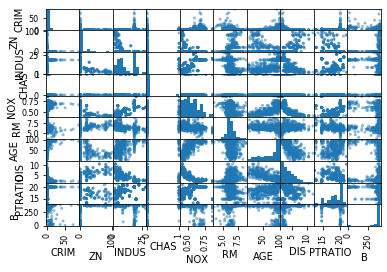

In [4]:
pd.plotting.scatter_matrix(boston_features.iloc[:, :10])

## Correlation matrix

Next, let's look at the correlation matrix: 

In [5]:
boston_features.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.289946,-0.385064,0.455621,-0.197472,-0.184650,0.461645,-0.202608,-0.186193,-0.155891,0.612627
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.391679,0.175520,-0.412995,0.076190,-0.005934,-0.229186,0.140942,0.151576,-0.084612,-0.284384
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.383248,-0.356977,0.603800,-0.030002,-0.108959,0.362516,-0.330365,-0.332186,0.179166,0.644249
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.121515,0.048788,-0.053929,0.007389,0.056601,-0.012195,0.074966,-0.038702,0.008553,-0.027027
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.188933,-0.380051,0.590879,-0.229389,0.075839,0.387153,-0.282659,-0.311681,0.180592,0.600519
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.355501,0.128069,-0.613808,-0.113768,0.083847,-0.098933,0.168673,0.059543,-0.076881,-0.243649
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.261515,-0.273534,0.602339,-0.144934,0.012508,0.297870,-0.231845,-0.205463,0.126656,0.459175
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.232471,0.291512,-0.496996,0.159835,-0.025191,-0.311943,0.159853,0.392246,-0.179574,-0.495579
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,1.000000,-0.177383,0.374044,0.165909,-0.478578,0.376461,-0.265111,-0.050772,-0.174969,0.494745
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.177383,1.000000,-0.366087,0.150520,0.074438,-0.311795,0.194231,0.133179,0.028226,-0.435540


Return `True` for positive or negative correlations that are bigger than 0.75: 

In [6]:
abs(boston_features.corr()) > .75

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
AGE,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
DIS,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
PTRATIO,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
B,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


Remove the most problematic feature from the data: 

In [7]:
boston_features.drop('NOX', axis=1)

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,69.1,2.4786,21.0,391.99,9.67,0,0,0,1,0,0,0
502,0.04527,0.0,11.93,0.0,6.120,76.7,2.2875,21.0,396.90,9.08,0,0,0,1,0,0,0
503,0.06076,0.0,11.93,0.0,6.976,91.0,2.1675,21.0,396.90,5.64,0,0,0,1,0,0,0
504,0.10959,0.0,11.93,0.0,6.794,89.3,2.3889,21.0,393.45,6.48,0,0,0,1,0,0,0


## Summary
Good job! You got some hands-on practice creating and interpreting a scatter matrix and correlation matrix to identify if variables are collinear in the Boston Housing data set. You also edited the Boston Housing data set so highly correlated variables are removed.